In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
import copy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('drive/My Drive/btp/station_locations.xlsx')
ws_data = pd.read_excel('drive/My Drive/btp/ws.xlsx')

In [ ]:
data.head()

,Station Name,Latitude,Longitude
0,Alipur,28.815329,77.153010
1,Anand_Vihar,28.646835,77.316032
2,Ashok_Vihar,28.695381,77.181665
3,Bawana,28.776200,77.051074
4,DTU,28.750050,77.111261


In [ ]:
pm_data = pd.read_excel('drive/My Drive/btp/pm2.xlsx')

In [ ]:
pm_data.head()

,FromDate,ToDate,Alipur,Anand_Vihar,Ashok_Vihar,Bawana,DTU,Dr_Karni_Singh_Shooting_Range,Dwarka_Sector_8,IHBAS,Jahangirpuri,Jawaharlal_Nehru_Stadium,Major_Dhyan_Chand_National_Stadium,Mandir_Marg,Mundka,NSIT_Dwarka,Najafgarh,Narela,Nehru_Nagar,Okhla_Phase_2,Patparganj,Punjabi_Bagh,Pusa_Delhi_DPCC,RK_Puram,Rohini,Shadipur,Sirifort,Sonia_Vihar,Sri_Aurobindo_Marg,Vivek_Vihar,Wazirpur
0,01-Jan-2019 - 00:00,01-Jan-2019 - 01:00,361.5,517.25,408.25,128.0,349.00,360.0,486.00,330.65,414.25,608.5,350.50,386.25,474.5,504.96,186.25,271.75,689.50,504.25,458.25,501.25,420.25,655.50,406.0,291.55,432.75,415.0,252.5,347.5,467.0
1,01-Jan-2019 - 01:00,01-Jan-2019 - 02:00,348.0,531.25,466.75,138.0,374.75,312.0,401.75,316.53,402.00,677.0,366.75,383.50,397.0,465.76,197.50,250.50,596.00,504.75,472.25,521.25,475.75,583.50,401.0,371.05,401.75,533.0,289.5,307.0,483.0
2,01-Jan-2019 - 02:00,01-Jan-2019 - 03:00,298.0,542.00,496.00,123.0,383.00,291.0,333.75,297.23,361.75,655.0,352.75,467.50,308.0,410.38,192.50,237.00,524.50,482.25,440.50,538.50,515.75,435.75,376.0,468.18,398.75,431.0,292.5,288.5,473.5
3,01-Jan-2019 - 03:00,01-Jan-2019 - 04:00,276.5,547.50,467.25,125.0,337.75,287.0,256.75,279.30,329.75,550.5,326.00,474.75,318.5,320.13,188.75,249.25,462.25,426.25,437.25,465.25,487.25,351.50,340.0,458.30,364.75,414.0,283.5,294.0,496.0
4,01-Jan-2019 - 04:00,01-Jan-2019 - 05:00,295.0,497.00,453.25,130.0,387.00,289.0,222.25,258.45,346.00,441.0,271.00,435.00,304.5,273.90,182.25,261.00,370.50,365.50,396.00,361.00,454.50,319.75,371.0,417.15,327.75,381.0,264.5,334.0,513.0


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
pm_data_scaled = min_max_scaler.fit_transform(pm_data.drop(labels=['FromDate','ToDate'],axis=1))
pm_data_normalized = pd.DataFrame(pm_data_scaled)

In [ ]:
pm_data_normalized.shape

(8749, 29)

In [ ]:
index_val = []
for i in range(pm_data_normalized.shape[1]):
  index1 = []
  for j in range(pm_data_normalized.shape[1]):
    if i != j:
      a = ((data['Latitude'][i]-data['Latitude'][j])**2)
      b = ((data['Longitude'][i]-data['Longitude'][j])**2)
      ans = (a+b)**0.5
      index1.append(ans)
  i1=0
  val = [i]
  index2 = copy.copy(index1)
  while(i1<3):
    val.append(index1.index(max(index2)))
    index2.remove(max(index2))
    i1 += 1
  index_val.append(val)
print(index_val)

[[0, 4, 13, 16], [1, 13, 2, 12], [2, 13, 4, 16], [3, 4, 16, 1], [4, 4, 16, 13], [5, 14, 3, 13], [6, 26, 0, 1], [7, 13, 12, 3], [8, 13, 5, 16], [9, 13, 14, 3], [10, 13, 14, 3], [11, 13, 14, 3], [12, 5, 16, 1], [13, 26, 1, 7], [14, 26, 1, 7], [15, 5, 16, 25], [16, 14, 15, 3], [17, 14, 15, 3], [18, 14, 3, 15], [19, 15, 0, 14], [20, 14, 15, 5], [21, 14, 5, 17], [22, 5, 17, 14], [23, 14, 5, 15], [24, 15, 14, 3], [25, 14, 13, 6], [26, 15, 0, 3], [27, 14, 13, 3], [28, 14, 5, 17]]


In [ ]:
pm_data_normalized.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.362809,0.549348,0.420010,0.122967,0.360474,0.372093,0.545914,0.334132,0.417424,0.700230,0.361922,0.40873,0.483690,0.689431,0.205347,0.304652,0.746818,0.557927,0.466175,0.507338,0.429703,0.748288,0.424686,0.449292,0.44671,0.539136,0.275354,0.363019,0.480829
1,0.349166,0.564246,0.480195,0.133130,0.387070,0.322481,0.451278,0.319863,0.405051,0.779056,0.378714,0.40582,0.404689,0.635911,0.217751,0.280830,0.645546,0.558481,0.480417,0.527581,0.486452,0.666096,0.419456,0.534610,0.41471,0.692433,0.315703,0.320710,0.497409


In [ ]:
train_size = int(len(pm_data_normalized) * 0.9)
train, test = pm_data_normalized.iloc[0:train_size], pm_data_normalized.iloc[train_size:len(pm_data_normalized)]
print(len(train), len(test))

7874 875


In [ ]:
len(train[1])

7874

In [ ]:
train_data = []
test_data = []
for i in range(train.shape[1]):
  train_data.append(list(train[i].to_numpy()))
  test_data.append(list(test[i].to_numpy()))

In [ ]:

train_x1 = []
train_y1 = []
window=24
for i in range(len(train_data[0])-window):
  train_tempX = []
  train_tempY = []
  for j in range(train.shape[1]):
    train_tempX.append(train_data[j][i:i+window-1])
    train_tempY.append(train_data[j][i+window])
  train_x1.append(train_tempX)
  train_y1.append(train_tempY)
train_X_2d = np.array(train_x1)
train_Y_2d = np.array(train_y1)
print(train_X_2d.shape)
print(train_Y_2d.shape)

(7850, 29, 23)
(7850, 29)


In [ ]:

test_x1 = []
test_y1 = []
window=24
for i in range(len(test_data[0])-window):
  test_tempX = []
  test_tempY = []
  for j in range(test.shape[1]):
    test_tempX.append(test_data[j][i:i+window-1])
    test_tempY.append(test_data[j][i+window])
  test_x1.append(test_tempX)
  test_y1.append(test_tempY)
test_X_2d = np.array(test_x1)
test_Y_2d = np.array(test_y1)
print(test_X_2d.shape)
print(test_Y_2d.shape)

(851, 29, 23)
(851, 29)


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
ws_data_scaled = min_max_scaler.fit_transform(ws_data.drop(labels=['FromDate','ToDate'],axis=1))
ws_data_normalized = pd.DataFrame(ws_data_scaled)

train_size = int(len(ws_data_normalized[0]) * 0.9)
ws_train = []
ws_test = []
for i in range(train_size-24):
  ws_train1 = ws_data_normalized.iloc[i:i+23]
  ws_train1 = ws_train1.sum()/23
  ws_train.append(ws_train1)

for i in range(train_size,len(ws_data_normalized)-24):
  ws_test1 =  ws_data_normalized.iloc[i:i+23]
  ws_test1 = ws_test1.sum()/23
  ws_test.append(ws_test1)

ws_train = np.array(ws_train)
ws_test = np.array(ws_test)

print(ws_train.shape, ws_test.shape)

(7850, 29) (851, 29)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,concatenate,Input,Flatten,Conv3D,Reshape
from tensorflow.keras.models import Model

In [ ]:
input_vector = Input(shape=(train_X_2d.shape[1:]), name='main_input')
x = LSTM(units =150,activation = 'relu', return_sequences = True)(input_vector)
x = LSTM(units =150,activation = 'relu')(x)
x = Dense(150, activation='relu')(x)
auxiliary_input=Input(shape=(29), name='aux_input')
x = concatenate([x, auxiliary_input])
x = Dense(300, activation='relu')(x)
main_output = Dense(29, name='main_output')(x)
model = Model(inputs=[input_vector,auxiliary_input], outputs=main_output)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 29, 23)]     0                                            
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 29, 150)      104400      main_input[0][0]                 
__________________________________________________________________________________________________
lstm_7 (LSTM)                   (None, 150)          180600      lstm_6[0][0]                     
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 150)          22650       lstm_7[0][0]                     
____________________________________________________________________________________________

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)
model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mae'])

In [ ]:
history=model.fit([train_X_2d,ws_train],[train_Y_2d],epochs=50)

Epoch 1/50
246/246 [==============================] - 22s 89ms/step - loss: 0.0079 - mae: 0.0574
Epoch 2/50
246/246 [==============================] - 22s 89ms/step - loss: 0.0034 - mae: 0.0367
Epoch 3/50
246/246 [==============================] - 22s 89ms/step - loss: 0.0028 - mae: 0.0333
Epoch 4/50
246/246 [==============================] - 22s 89ms/step - loss: 0.0027 - mae: 0.0324
Epoch 5/50
246/246 [==============================] - 22s 90ms/step - loss: 0.0025 - mae: 0.0307
Epoch 6/50
246/246 [==============================] - 22s 90ms/step - loss: 0.0023 - mae: 0.0298
Epoch 7/50
246/246 [==============================] - 22s 89ms/step - loss: 0.0023 - mae: 0.0295
Epoch 8/50
246/246 [==============================] - 22s 90ms/step - loss: 0.0023 - mae: 0.0296
Epoch 9/50
246/246 [==============================] - 27s 110ms/step - loss: 0.0022 - mae: 0.0291
Epoch 10/50
246/246 [==============================] - 22s 90ms/step - loss: 0.0022 - mae: 0.0291
Epoch 11/50
246/246 [=======

In [ ]:
predictions = model.predict([test_X_2d,ws_test])
print(predictions.shape)
print(test_Y_2d.shape)

(851, 29)
(851, 29)


In [ ]:
new=[]
newtest=[]
for i in range(predictions.shape[0]):
  new.append(predictions[i][5])
  newtest.append(test_Y_2d[i][2])
new=np.array(new)
newtest=np.array(newtest)
print(new.shape)

(851,)


<Figure size 432x288 with 0 Axes>

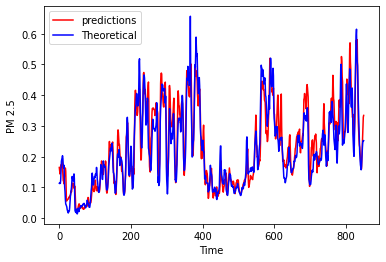

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

plt.plot(new, 'r')
plt.plot(newtest, 'b')
plt.xlabel("Time")
plt.ylabel("PM 2.5")
plt.legend(["predictions","Theoretical"])

plt.figure()
